<a href="https://colab.research.google.com/github/mhtarora39/Mask_RCNN/blob/master/Onions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
##File Loading in collab
from google.colab import files
uploaded = files.upload()

Saving val_label.json to val_label.json


In [0]:
import json
## Pandas, Matplotlib and numpy for visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
##Declaring file name as global
TRAIN_JSON = "train_label.json"
FILE_PATH = TRAIN_JSON
VAL_JSON   = "val_label.json"

In [0]:
## conversion to data_frame
class OnionDataAnalytics():
  
  def __init__(self,path):
    self._path_ = path

  
  def convert_json_to_data_frame(self,json_obj):
    """This function convert json to data frame.

      Args:
        json_obj: json object 

      Returns:
        pandas frame.
    """
    data_frame = pd.DataFrame.from_dict(json_obj, orient='index')
    data_frame.reset_index(level=0, inplace=True)
    return data_frame



  def convert_json_file_to_data_frame(self):
    """This function opens the json file and convert that json to data frame.

      Returns:
        pandas frame.

      Raises:
        Todo:
        IOError : If file is not availible.
      """
    file_handler = open(self._path_)
    data_store   = json.load(file_handler)
    ##To do catch exceptions and close file safely
    #file_handler.close()
    return self.convert_json_to_data_frame(data_store)
  
  def get_id_from_defect_type(self,class_name):
    if(class_name.lower() == "smut effected"):
      return 1
    return 2
  ###ToDO ADD support for onoion
  def get_id_from_type(self,class_name):
    if(class_name.lower() == "defect"):
      return 2
    elif(class_name.lower() == "object"):
      return 1
    else:
      #from some of the images class name is missing 
      return 0
   

  def pre_process_onions_data(self):
    """Convert json to data frame and preprocess it
  
    Returns:
      pandas frame.
    """ 
    df_onions  = self.convert_json_file_to_data_frame()
    df_regions = df_onions["regions"]
    ## list of attributes  
    df_onions['shape_attributes']  = pd.Series(dtype='object')
    df_onions['region_attributes'] = pd.Series(dtype='object')

    for outer_index,item in enumerate(df_regions):
      ## each region
      tmp_shapes  = []
      tmp_regions = []
      for region in (item):
        tmp_shapes.append(region['shape_attributes'])
        tmp_regions.append(region['region_attributes'])

      df_onions.at[outer_index,'shape_attributes']  = tmp_shapes 
      df_onions.at[outer_index,'region_attributes'] = tmp_regions
    del df_onions['regions']
    del df_onions['file_attributes']
    self._data_frame_ = df_onions
    return df_onions

  ##static##
  def get_count_of_keys(data_frame,data_key):
    
    """
      This function filter the data frame by given keys
      
      Args:
        data_frame: Pandas data frame of list type
        data_key  : Key on which data frame return count

      Returns:
        onion_dict      : Global count of each key   
        onion_dict_list : count of each key(i.e defect) per index

      Raises:
        ToDo .....

    """
    onion_dict = {}
    onion_dict_list = []
    ## each item is containing list of onions with respect to single image
    
    #starts 1st loop
    for index,items in enumerate(data_frame):
      tmp_onion_dict = {}
      ## this element has single type onion information in an image

      #starts 2nd loop
      for element in items:
        ## filtering of data key 
        key = element[data_key]
        if key in tmp_onion_dict:
          tmp_onion_dict[key] += 1 
        else:
          tmp_onion_dict[key]  = 1
      #ends 2nd loop

      ## appending each key count to onion_dict_list
      onion_dict_list.append(tmp_onion_dict)
      ## calculating sum of global keys 
      
      #starts 3rd loop
      for key in tmp_onion_dict.keys():
        if key in onion_dict:
          onion_dict[key] += tmp_onion_dict[key]
        else:
          onion_dict[key] = tmp_onion_dict[key] 
      #ends 2nd loop
      
    #ends 1st loop 
    return onion_dict , onion_dict_list      
    
  @staticmethod
  def explore_data(data_dict,title="",xlabel = "categories",ylabel="count",fig_size = (8,5)  ):
  
    """
      This function plot the graph

      Args: 
      data_dict: This map keys are going to plot on x-axis and 
                y-axis contains the value
    
    """
    plt.figure(figsize=fig_size)#1.5*len(list(data_dict.keys())),5))
    plt.bar(range(len(data_dict)), list(data_dict.values()), align='center')
    plt.xticks(range(len(data_dict)), list(data_dict.keys()),c="white")
    plt.yticks(c="white")
    plt.xlabel(xlabel,c="w")
    plt.ylabel(ylabel,c="w")
    plt.title(title,c="w")
    plt.show()
  
  @staticmethod
  def explore_data_list(list_data_dict):
    """
      This function plot the muliple graphs

      Args: 
      list_data_dict: This is list of map where keys are going to ploat on 
                      x-axis and y-axis contains the value
      
    """
    for data_dict in list_data_dict:
      OnionDataAnalytics.explore_data(data_dict)

    
    

  def select_traning_data_indices(self,list_of_dict,key,train_ratio,sum,get_index = False,join_key = None):
    """ 
      This function chooses the training set which has better data distribution 
      among the classes

      1) We are going to find the images based on defects and object first 
      Args : 
      list_of_dict  : This accept list of dictionary(i.e. onion type vs count) of images 
      train_ratio   : amount of data we would like to split
      sum           : sum of given data      
      
      Returns: 
      {
       "List of Indices" :  [],
       "List of Values"  :  [],
      }
      ToDo ...  
      Raises:
      if ratio grater then 1  

    """
    if(train_ratio > 1):
      return None
    
    if(get_index):
      index_or_filename = list(np.arange(0,len(self._data_frame_["filename"])))
    else:
      index_or_filename = list(self._data_frame_["filename"])
    count_list = []
    #key "defect"
    for index,element in enumerate(list_of_dict):
      if key in element:
        count_list.append(list_of_dict[index][key])
      else:
        count_list.append(0)
    train_data = {}
    val_data = {} 
    train_sum = 0
    train_data["List of Indices"] = []
    train_data["List of Values"]  = []
    val_data["List of Indices"] = []
    val_data["List of Values"]  = []
    zipped_lists = zip(count_list,index_or_filename)
    zipped_lists = sorted(zipped_lists,reverse=True)
    for tuples in zipped_lists:
      #todo clean up
      if(train_sum >= sum):
        val_data["List of Indices"].append(tuples[1])
        val_data["List of Values"].append(tuples[0])
        continue
    
      train_data["List of Indices"].append(tuples[1])
      train_data["List of Values"].append(tuples[0])
      train_sum += tuples[0]

      
    return train_data,val_data


     
    """
      list_of_std = []
      for index,item in enumerate(list_of_dict):
        ## appending index and std 
        list_of_std.append((np.std(list(item.values())),index))
      
      ## sorting based of std
      list_of_std.sort(key = lambda x: x[0])
      split = int(train_ratio*len(list_of_std))
      
      train = list_of_std[:split]
      test  = list_of_std[split:]
      return (train ,test)      
    """
  def find_join_in_data_frame(self,key,key1,key2):
    """
    This function uses the keys of lists in data frame and find join for that
    
    Args :
       Key  : Key in data frame
       key1 : This is key of json / dict inside the list
       Key2 : This is key of json / dict inside the list
    
    Return:
       Pair of possible value and there count 
    """ 
    ret_dic = {}
    tmp_df = self._data_frame_[key]
    for item_list in tmp_df:
      for element in item_list:
        pair = (element[key1],element[key2])
        if pair in ret_dic:
          ret_dic[pair] += 1
        else:
          ret_dic[pair]  = 1
    return ret_dic  




    
    



In [0]:
onion_data = OnionDataAnalytics(FILE_PATH)
onion_data_frame = onion_data.pre_process_onions_data()

In [0]:
onion_data_frame.keys()

Index(['index', 'filename', 'size', 'shape_attributes', 'region_attributes'], dtype='object')

In [0]:
onion_type_dict , onion_type_dict_list   = OnionDataAnalytics.get_count_of_keys(onion_data_frame["region_attributes"],'onion')
onion_defect_dict ,onion_defect_list = OnionDataAnalytics.get_count_of_keys(onion_data_frame["region_attributes"],'type')

In [0]:
onion_type_dict

{'double onion': 58,
 'half cut': 142,
 'onion': 3077,
 'rotten': 430,
 'smut effected': 1418,
 'sprouting': 9}

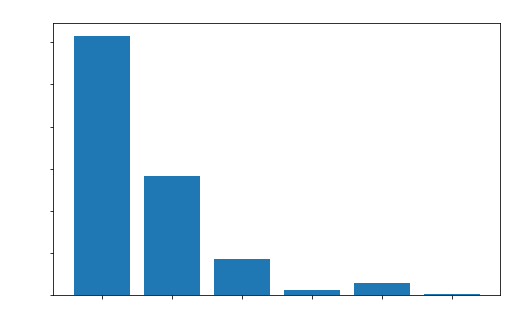

In [0]:
OnionDataAnalytics.explore_data(onion_type_dict,title="Onion categories vs Count")

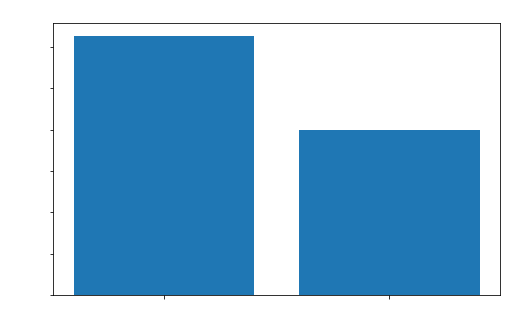

In [0]:
OnionDataAnalytics.explore_data(onion_defect_dict,title="Onion state vs Count")

In [0]:
onion_defect_dict

{'Defect': 1999, 'Object': 3135}

In [0]:
onion_type_dict

{'double onion': 58,
 'half cut': 142,
 'onion': 3077,
 'rotten': 430,
 'smut effected': 1418,
 'sprouting': 9}

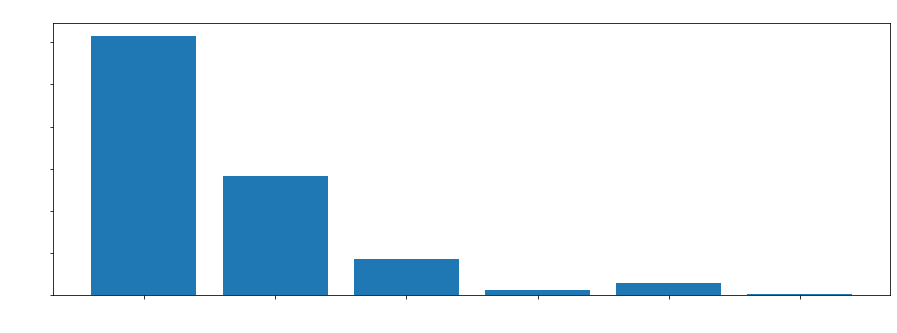

In [0]:
OnionDataAnalytics.explore_data(onion_data.find_join_in_data_frame("region_attributes","onion","type"),title="Onion state and type vs Count",fig_size=(15,5))

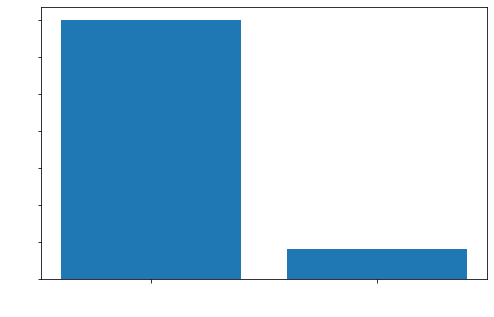

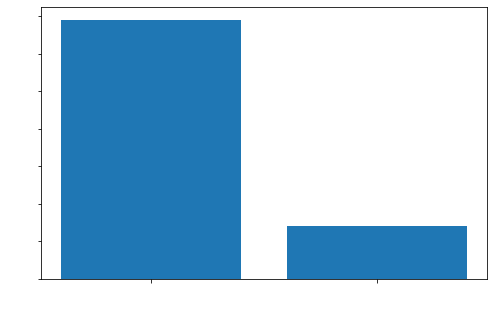

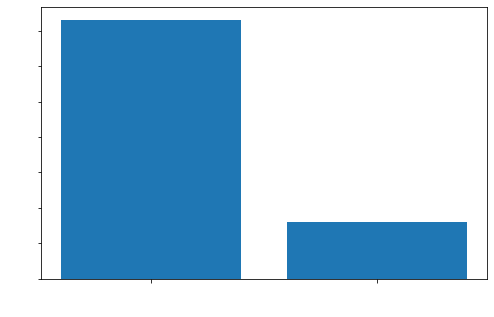

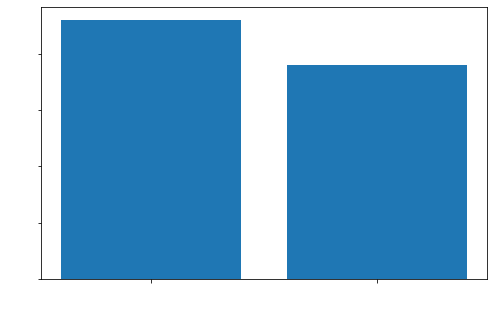

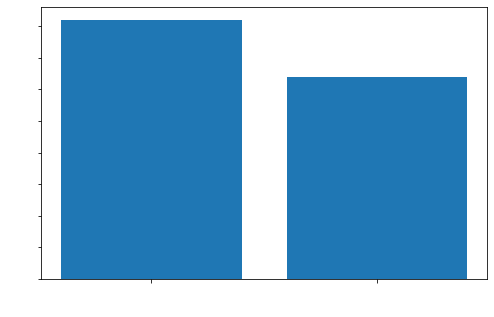

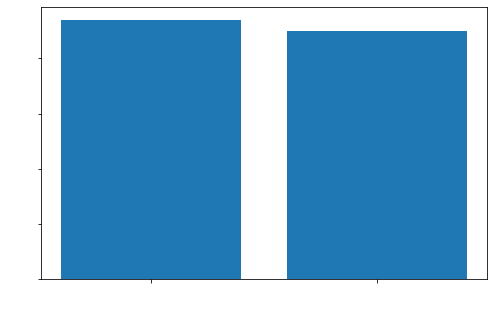

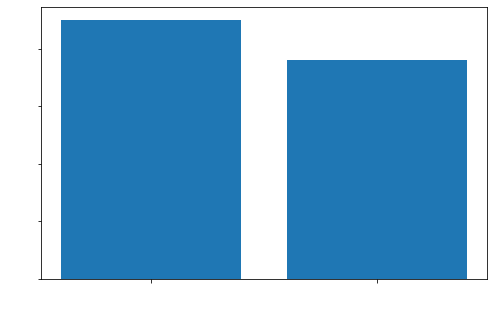

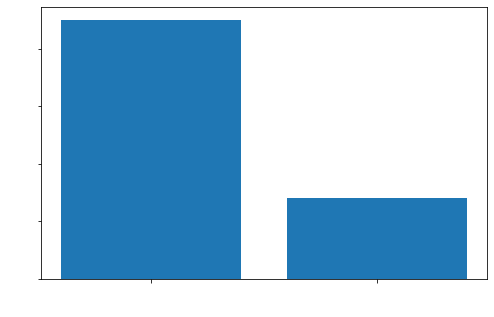

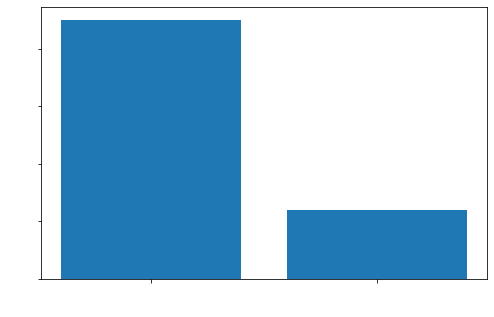

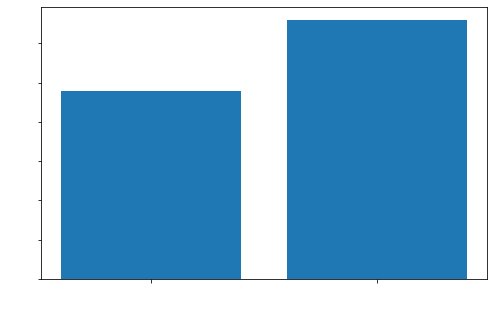

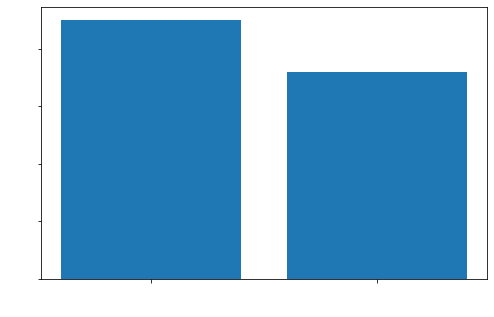

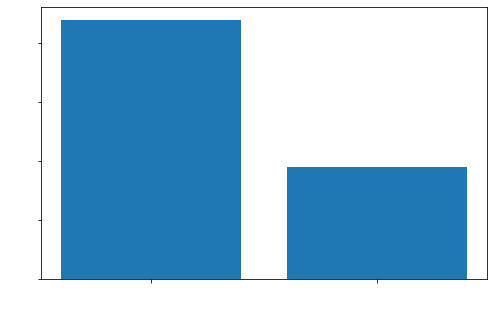

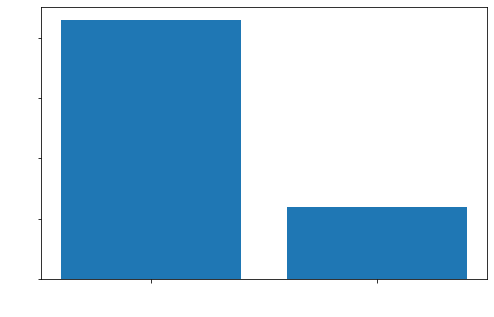

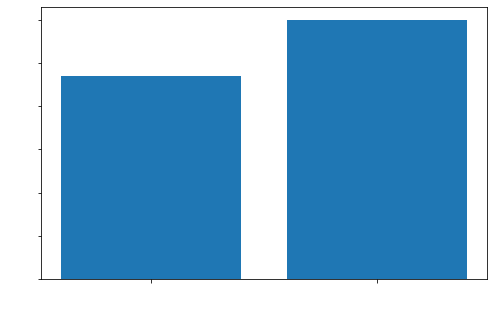

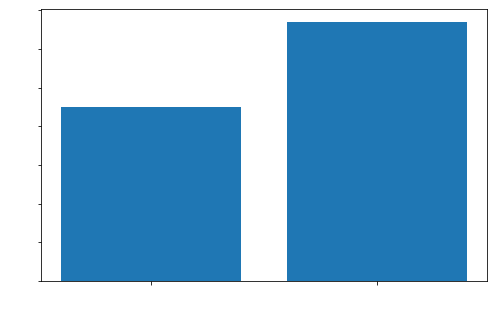

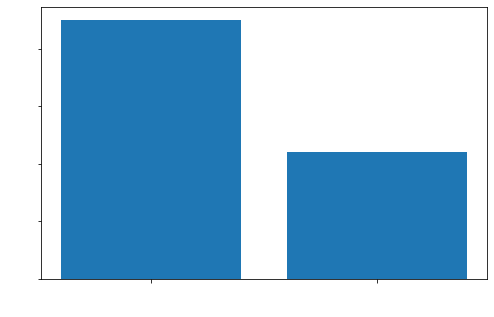

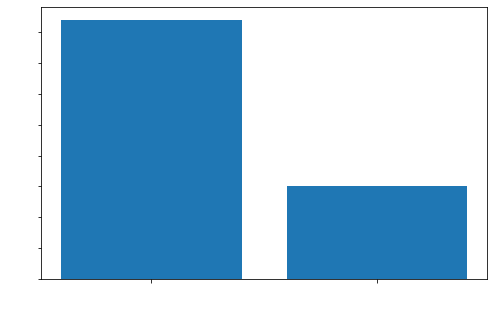

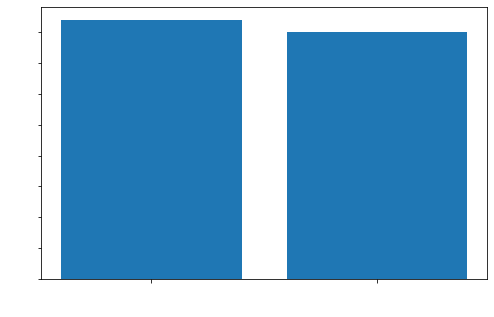

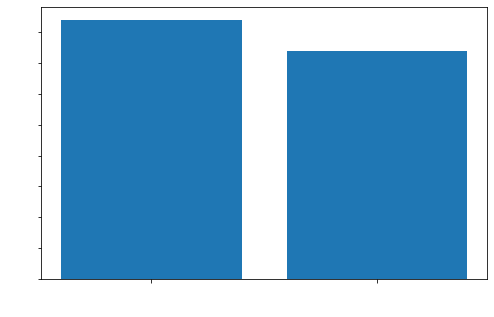

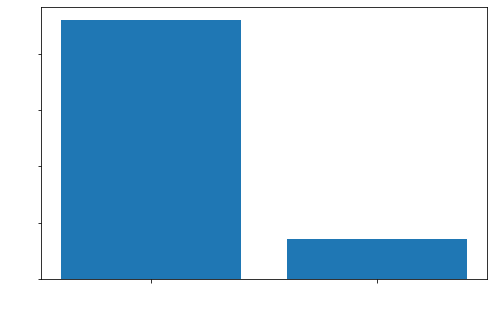

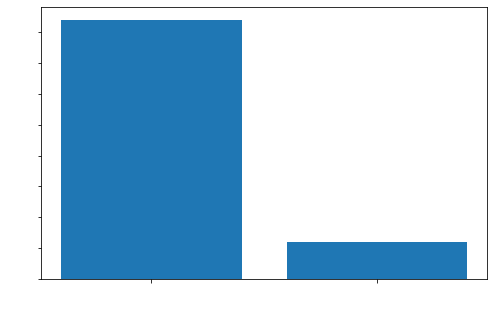

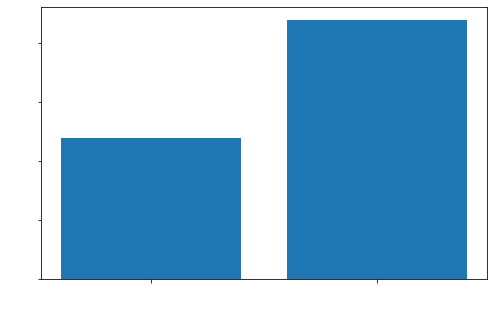

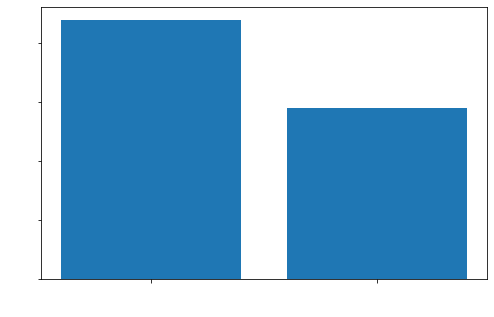

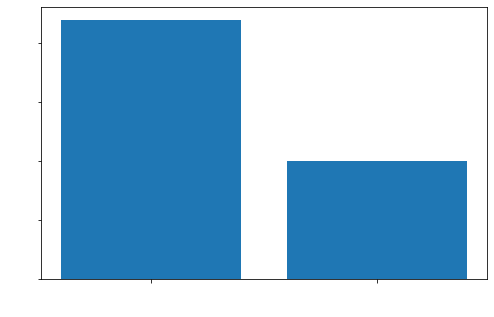

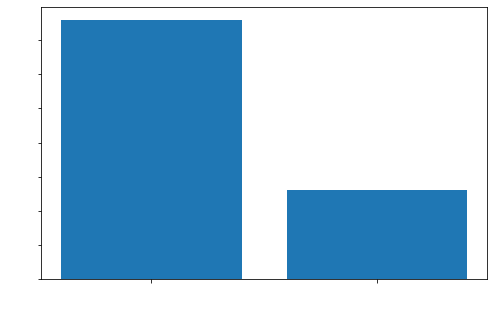

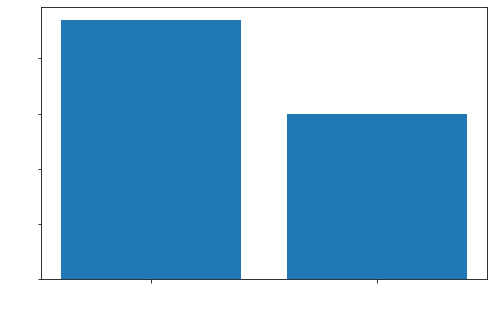

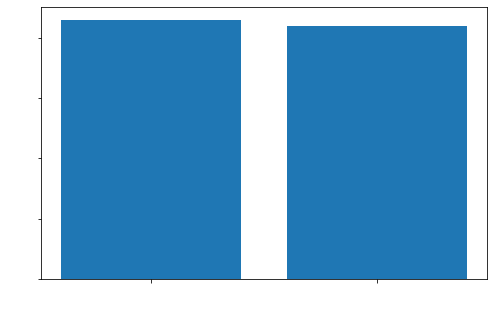

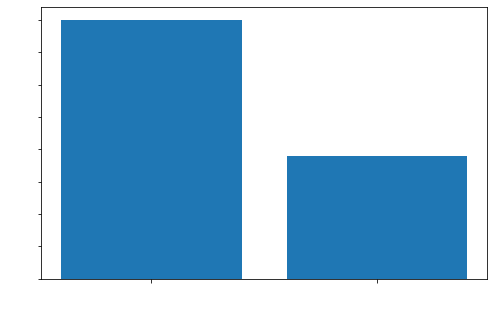

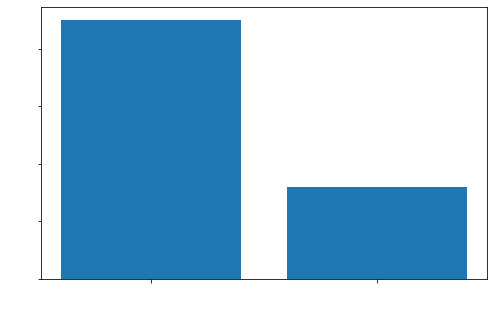

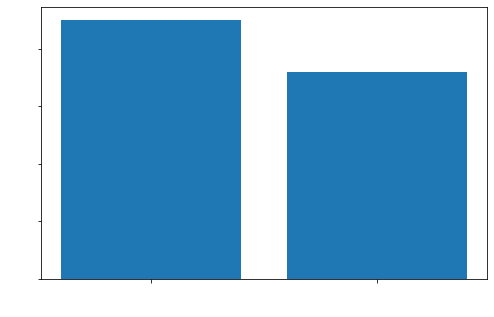

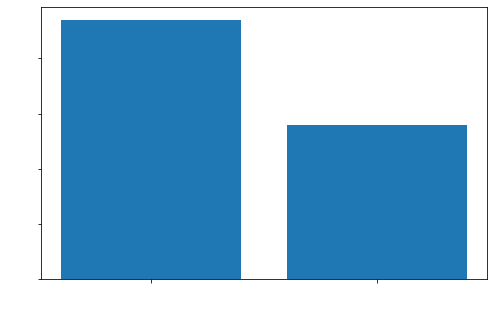

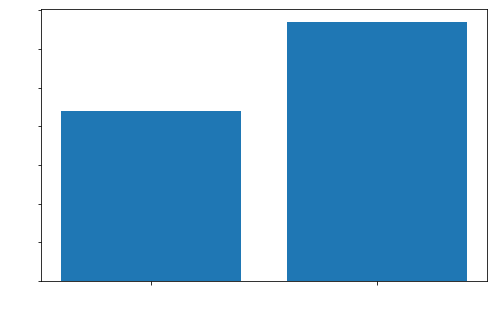

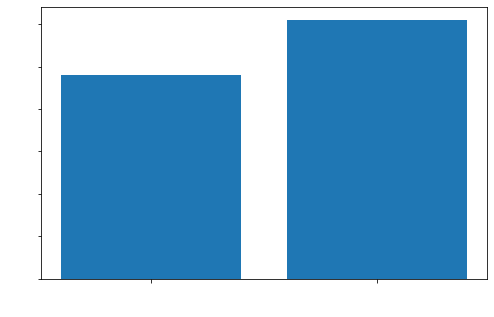

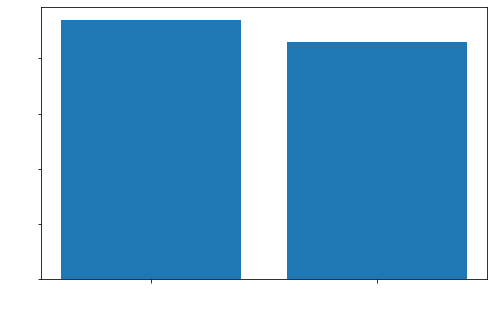

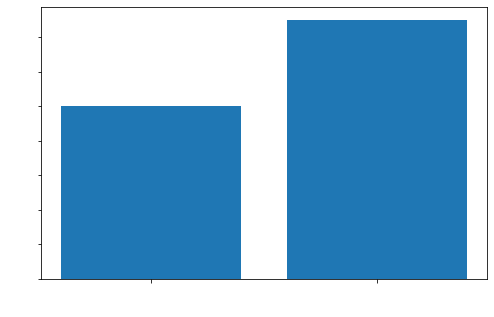

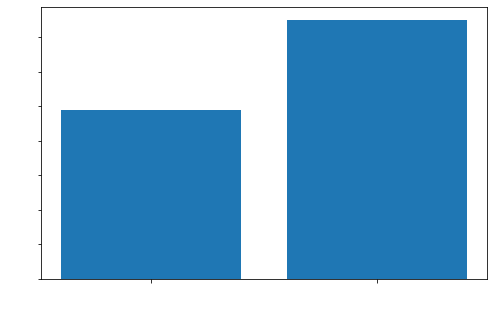

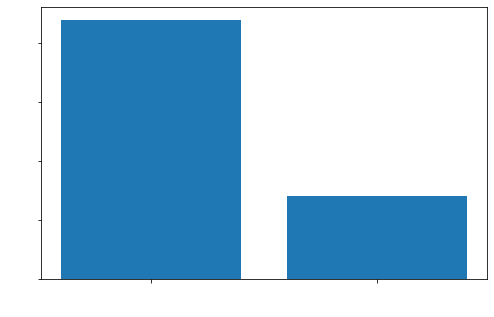

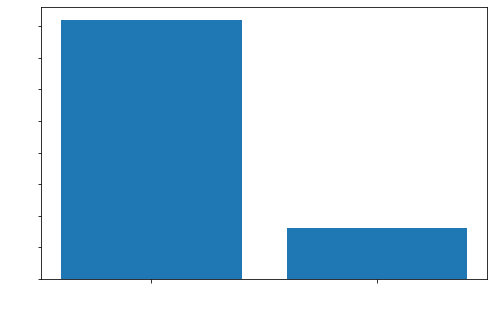

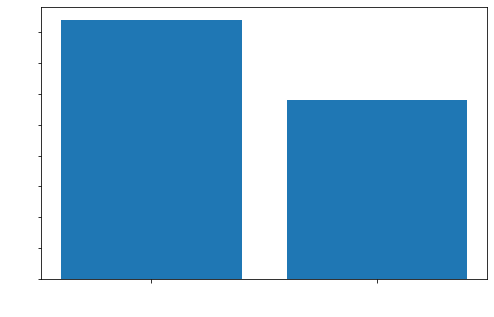

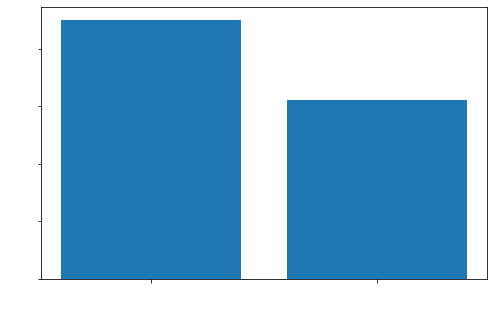

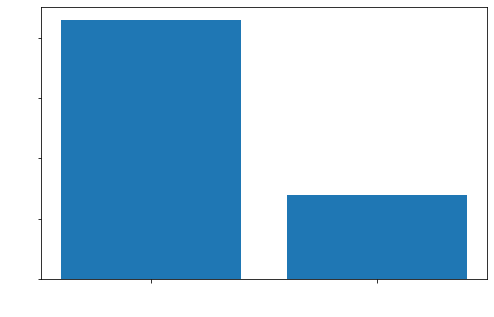

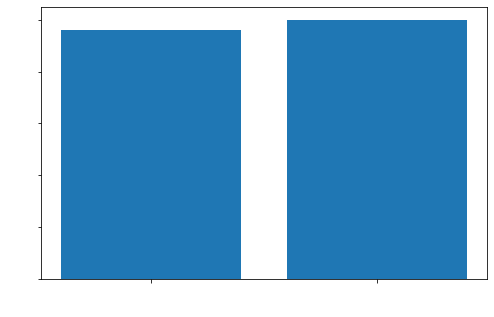

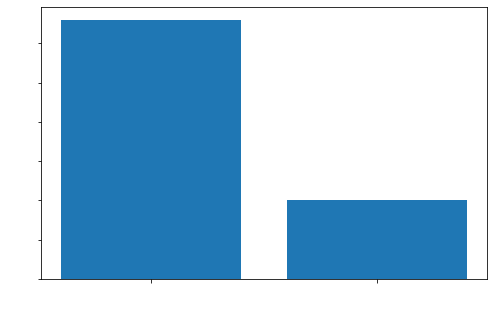

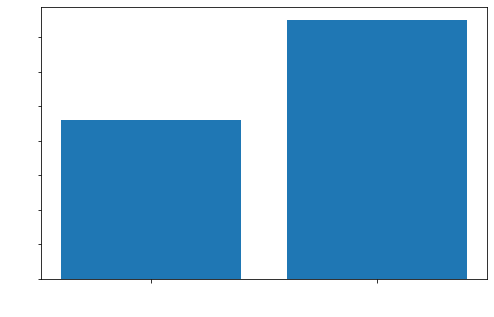

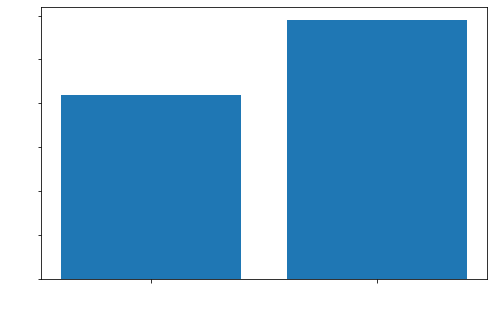

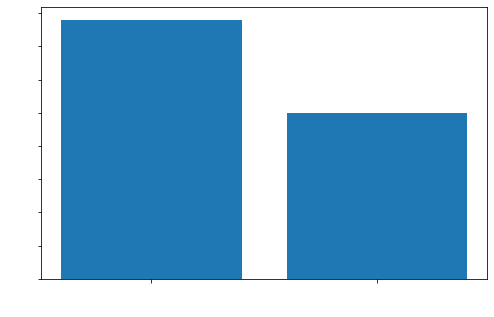

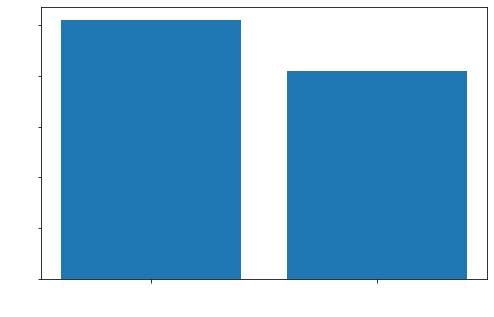

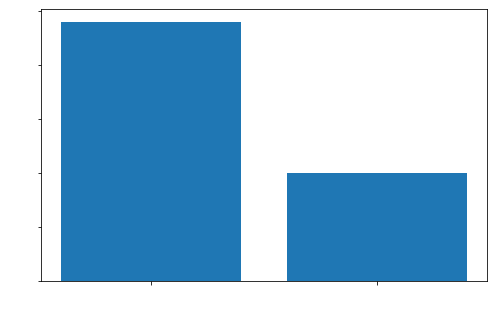

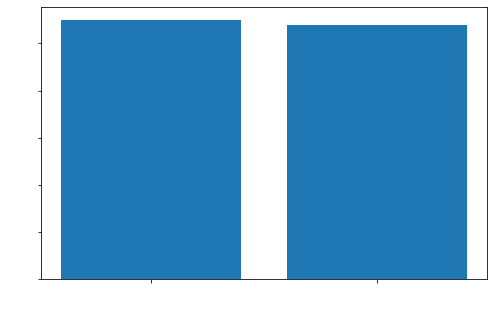

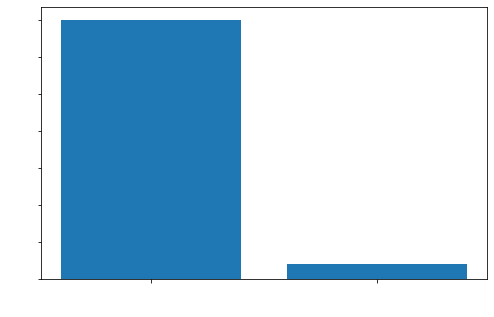

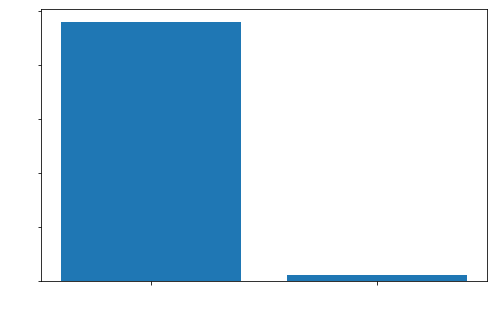

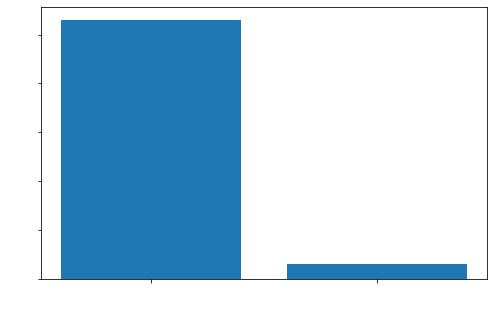

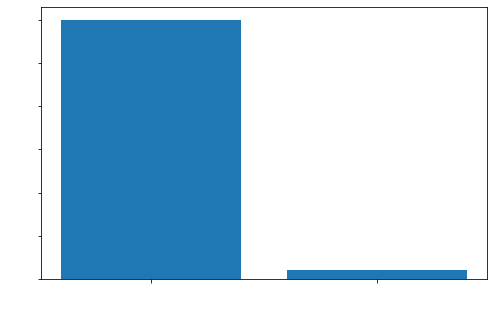

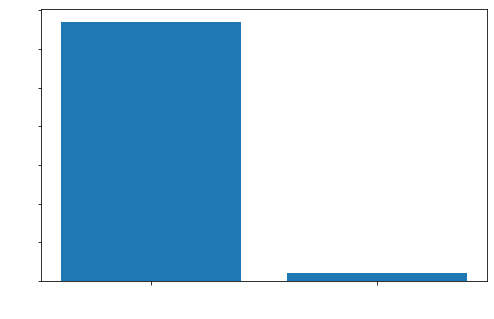

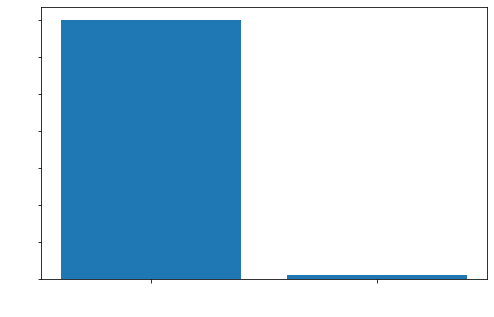

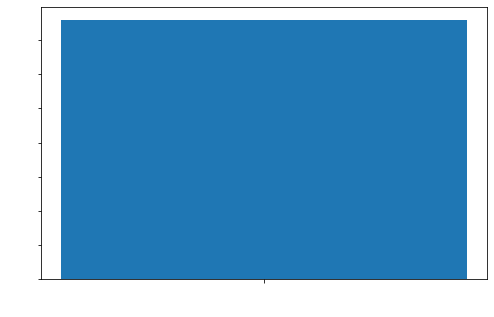

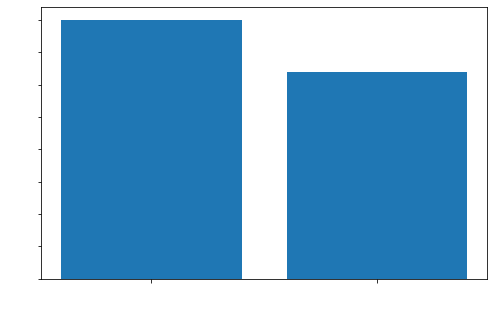

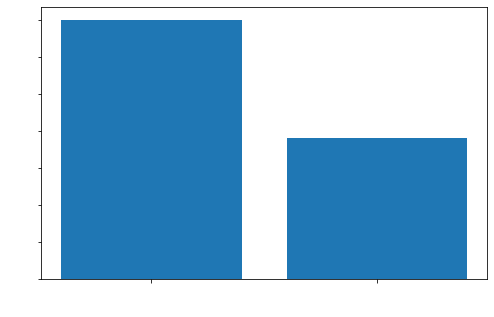

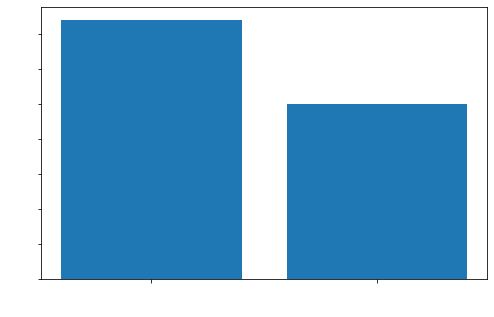

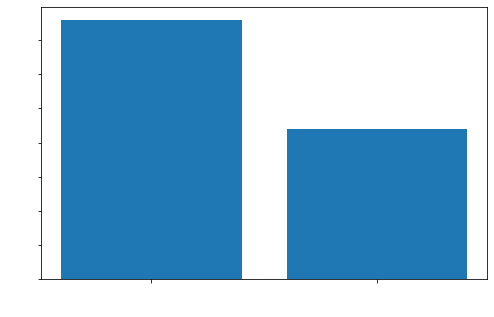

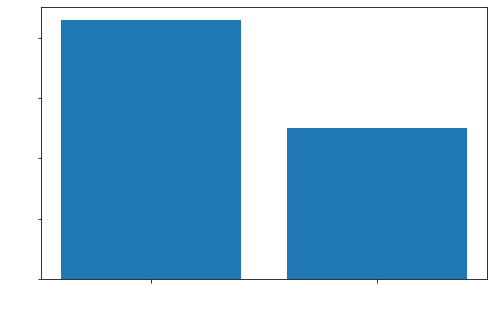

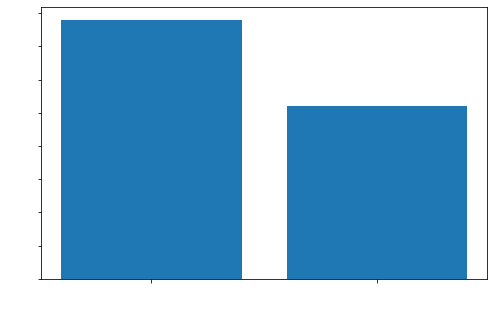

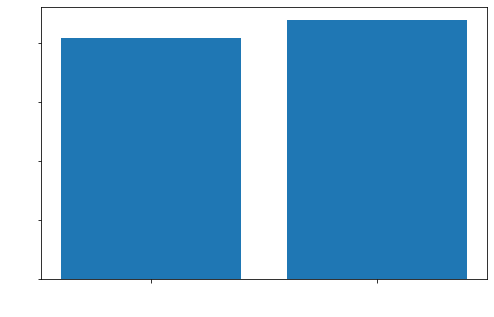

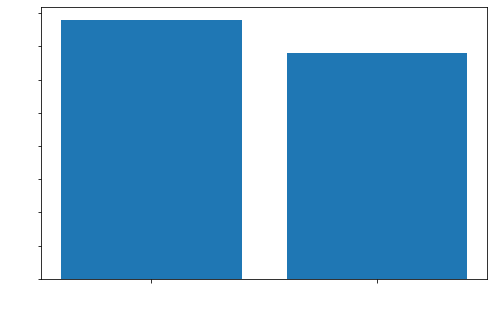

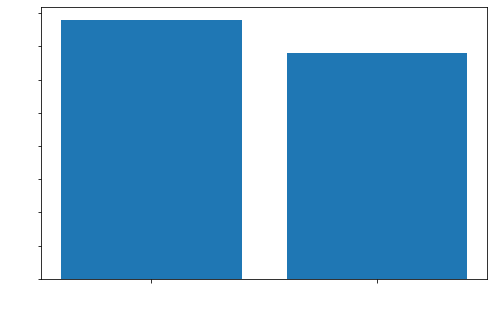

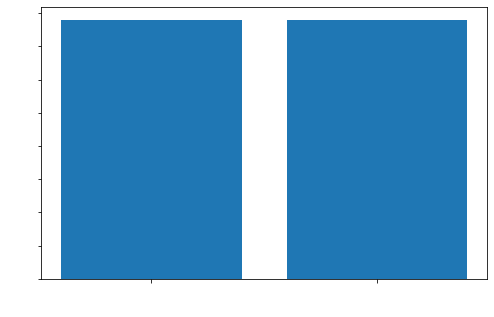

In [0]:
OnionDataAnalytics.explore_data_list(onion_defect_list)

In [0]:
######## INSTALL MASK RCNN STEPS #################
!git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 111.84 MiB | 11.28 MiB/s, done.
Resolving deltas: 100% (570/570), done.


In [0]:
cd Mask_RCNN

/content/Mask_RCNN


In [0]:
!chmod 777 setup.py
!python3 setup.py install
!pip show mask-rcnn

running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/mrcnn
copying mrcnn/utils.py -> build/lib/mrcnn
copying mrcnn/parallel_model.py -> build/lib/mrcnn
copying mrcnn/config.py -> build/lib/mrcnn
copying mrcnn/__init__.py -> build/lib/mrcnn
copying mrcnn/visualize.py -> build/lib/mrcnn
copying mrcnn/model.py -> build/lib/mrcnn
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/utils.py -> build/bdist.linux-x86_64/egg/mrcnn

In [0]:
# example of inference with a pre-trained coco model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from matplotlib import pyplot
from matplotlib.patches import Rectangle
import os



Using TensorFlow backend.


In [0]:
## import weight files:

##TODO : This will be the part of util files 

#Globel Drive paths :
MODEL_NAME = "Onion"
MODEL_PATH = "/content/drive/My Drive/Colab Notebooks/Onions"
MODEL_DIR  = "./"
COCO_MODEL = "mask_rcnn_coco.h5" 
DATA_PATH  = MODEL_PATH + "/" + "case_study/"
LOGS_DIR   = os.path.join(MODEL_PATH, "logs")
TRAINED_MODEL = os.path.join(LOGS_DIR,"onion20200322T1050/mask_rcnn_onion_0046.h5")

def mount_drive():
  from google.colab import drive
  drive.mount('/content/drive')
  return

def get_weights_path(name):
  if(name == "COCO"):
    return os.path.join(MODEL_PATH,COCO_MODEL)
  ##Todo Add the support for other pre trained model
  elif(name == MODEL_NAME):
    return TRAINED_MODEL  
  else:
    return None 



mount_drive()

# define the test configuration
    

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Let's Build Model Classes
import skimage.draw
import json
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
#import mrcnn.utils
from mrcnn import model as modellib, utils




class OnionModelConfig(Config):
  """
  Configuration for training on onion dataset.
  Derives from the base Config class and overrides some values.
  """
  NAME = MODEL_NAME
  IMAGES_PER_GPU = 1 #collab
  NUM_CLASSES = 1 + 1 + 1 # Background + onion + defect
  STEPS_PER_EPOCH = 50
  ##ToDo : make in 0.9 Just doing first time for
  ##Fast Traning 
  DETECTION_MIN_CONFIDENCE = 0.7
  ##may be need to override Anchors 

class OnionnDataManager(utils.Dataset):
  
  ##lets take defect images 
  def load_data_set(self,attribute,subset,type=None,clases = [],mode ="train"):
    """
    Load a subset of the Onion dataset.
    Args:
     attribute : Key in the dataset
     values    : value of the classes 
     subset: Subset to load: train or val

    only attributes are supported here "type" and "onion"

    """
    if(attribute != "type" and attribute != "onion"):
      return
    if(attribute == "type"):
      self.add_class(MODEL_NAME,1, "object")
      self.add_class(MODEL_NAME,2, "defect")
    
    elif(attribute == "onion"):
      for index,item in enumerate(classes):
        self.add_class(MODEL_NAME,index+1, item)
        
    

    #onion_data_frame = onion_data
    #getting frame of json
    #This will give type of onions in each image 
    
    ##to do remove sum
    sum = 100000
    if(subset == "val_data"):
        onion_data = OnionDataAnalytics(VAL_JSON)
        dataset_dir = os.path.join(DATA_PATH,"val_data")
    else:
       onion_data = OnionDataAnalytics(TRAIN_JSON)
       dataset_dir = os.path.join(DATA_PATH,"train_data")
       sum = 1400

    onion_data_frame = onion_data.pre_process_onions_data()

    _,onion_type_dict_list = OnionDataAnalytics.get_count_of_keys(onion_data_frame["region_attributes"],attribute)
    #Selecting Training Data based on list of onion types
    if(attribute == "type"):
      train,_ = onion_data.select_traning_data_indices(onion_type_dict_list,'Defect',0.7,sum,True)
    else:
      train,_ = onion_data.select_traning_data_indices(onion_type_dict_list,classes[0],0.7,sum,True)
    
    dic_of_list_indices = train
    
    ##to do remove hard coded

    dataset_dir = os.path.join(DATA_PATH,"train_data")
    #set each parameter
    
    ##Wrong data in json
    for index in dic_of_list_indices["List of Indices"]:
      if(onion_data_frame['filename'][index] == "IMG-0319.jpg" ):
        onion_data_frame['filename'][index] = "IMG-0319.JPG"
      elif(onion_data_frame['filename'][index] =="IMG-0320.jpg"):
        onion_data_frame['filename'][index] = "IMG-0320.JPG"
      
      print(onion_data_frame['filename'][index])  
      image_path = dataset_dir +"/"+ onion_data_frame['filename'][index]
      image = skimage.io.imread(image_path)
      height, width = image.shape[:2]
      #Polygons for each image
      polygons = onion_data_frame['shape_attributes'][index]
      #Setting numbers to class ids
      class_ids =[onion_data.get_id_from_type(attr[attribute]) for attr in onion_data_frame['region_attributes'][index]]
      class_names =[attr[attribute] for attr in onion_data_frame['region_attributes'][index]]
      
      self.add_image(
        MODEL_NAME,
        image_id=onion_data_frame['filename'][index],  # use file name as a unique image id
        path=image_path,
        width=width, height=height,
        polygons=polygons,
        class_ids=class_ids,
        class_names=class_names)
      
 
  def load_mask(self, image_id):
    """
        Generate instance masks for an image.
        Returns:
        masks: A bool array of shape [height, width, instance count] with
        one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
    """
    # If not a balloon dataset image, delegate to parent class.
    image_info = self.image_info[image_id]
    if image_info["source"] != MODEL_NAME:
      return super(self.__class__, self).load_mask(image_id)
    
    class_ids = image_info['class_ids']

    # Convert polygons to a bitmap mask of shape
    # [height, width, instance_count]
    info = self.image_info[image_id]
    mask = np.zeros([info["height"], info["width"], len(info["polygons"])],
                    dtype=np.uint8)
    for i, p in enumerate(info["polygons"]):
      # Get indexes of pixels inside the polygon and set them to 1
      rr, cc = skimage.draw.polygon(p['all_points_y'], p['all_points_x'])
      mask[rr, cc, i] = 1

    # Return mask, and array of class IDs of each instance. Since we have
    # one class ID only, we return an array of 1s
    # return mask.astype(np.bool), np.ones([mask.shape[-1]], dtype=np.int32)
    class_ids = np.array(class_ids, dtype=np.int32)
    return mask, class_ids  

  def image_reference(self, image_id):
    """Return the path of the image."""
    info = self.image_info[image_id]
    if info["source"] == MODEL_NAME:
        return info["path"]
    else:
        super(self.__class__, self).image_reference(image_id)


def train(model):
  """
  Train the model.
  """
 


  # Training dataset.
  dataset_train = OnionnDataManager()
  dataset_train.load_data_set("type","train_data")
  dataset_train.prepare()

  # Validation dataset
  dataset_val =  OnionnDataManager()
  dataset_val.load_data_set("type", "val_data")
  dataset_val.prepare()

  # *** This training schedule is an example. Update to your needs ***
  # Since we're using a very small dataset, and starting from
  # COCO trained weights, we don't need to train too long. Also,
  # no need to train all layers, just the heads should do it.
  # print("Training network heads")
  #model_inference = modellib.MaskRCNN(mode="inference", config=config,
  #                                          model_dir=LOGS_DIR)

  # mean_average_precision_callback = modellib.MeanAveragePrecisionCallback(model, model_inference, 
  #                                                                         dataset_val, calculate_map_at_every_X_epoch=1, verbose=1)

  model.train(dataset_train, dataset_val,
              learning_rate=config.LEARNING_RATE,
              epochs=50,
              layers='heads')
   #           custom_callbacks=[mean_average_precision_callback])
  
    

    
def color_splash(image, mask):
  """Apply color splash effect.
  image: RGB image [height, width, 3]
  mask: instance segmentation mask [height, width, instance count]
  Returns result image.
  """
  # Make a grayscale copy of the image. The grayscale copy still
  # has 3 RGB channels, though.
  gray = skimage.color.gray2rgb(skimage.color.rgb2gray(image)) * 255
  # Copy color pixels from the original color image where mask is set
  if mask.shape[-1] > 0:
      # We're treating all instances as one, so collapse the mask into one layer
      mask = (np.sum(mask, -1, keepdims=True) >= 1)
      splash = np.where(mask, image, gray).astype(np.uint8)
  else:
      splash = gray.astype(np.uint8)
  return splash


def detect_and_color_splash(model, image_path=None, video_path=None):
  assert image_path or video_path

  # Image or video?
  if image_path:
  # Run model detection and generate the color splash effect
    print("Running on {}".format(image_path))
    # Read image
    image = skimage.io.imread(image_path)
    skimage.io.imshow(image)
    # Detect objects
    print("Lets see image")
    r = model.detect([image], verbose=1)[0]
    # Color splash
    print("Masks",r["masks"])
    splash = color_splash(image, r['masks'])
    # Save output
    file_name = "splash_{:%Y%m%dT%H%M%S}.png".format(datetime.datetime.now())
    skimage.io.imshow(splash)
  elif video_path:
    import cv2
    # Video capture
    vcapture = cv2.VideoCapture(video_path)
    width = int(vcapture.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(vcapture.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = vcapture.get(cv2.CAP_PROP_FPS)

    # Define codec and create video writer
    file_name = "splash_{:%Y%m%dT%H%M%S}.avi".format(datetime.datetime.now())
    vwriter = cv2.VideoWriter(file_name,
                              cv2.VideoWriter_fourcc(*'MJPG'),
                              fps, (width, height))

    count = 0
    success = True
    while success:
        print("frame: ", count)
        # Read next image
        success, image = vcapture.read()
        if success:
            # OpenCV returns images as BGR, convert to RGB
            image = image[..., ::-1]
            # Detect objects
            r = model.detect([image], verbose=0)[0]
            # Color splash
            splash = color_splash(image, r['masks'])
            # RGB -> BGR to save image to video
            splash = splash[..., ::-1]
            # Add image to video writer
            vwriter.write(splash)
            count += 1
    vwriter.release()
  #print("Saved to ", file_name)






#onion_data_manager_test = OnionnDataManager() 
#test = onion_data_manager_test.load_data_set("type")
#print(len(test["List of Indices"]))


In [0]:
config = OnionModelConfig()
model = modellib.MaskRCNN(mode="training", config=config,
                                  model_dir=LOGS_DIR)
 
model.load_weights(get_weights_path(MODEL_NAME), by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",
  "mrcnn_bbox", "mrcnn_mask"])

train(model)

 

In [0]:
from mrcnn.utils import compute_ap
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
from mrcnn.model import log
import random

class EvalOnions():
  def __init__(self,dataset,model,cfg):
    self.dataset = dataset
    self.model   = model
    self.cfg     = cfg

 
  def evaluate_model(self):
    APs = list()
    precisions_dict = {}
    recall_dict     = {}
    for image_id in self.dataset.image_ids:
      # load image, bounding boxes and masks for the image id
      image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(self.dataset, self.cfg,image_id, use_mini_mask=False)
      # convert pixel values (e.g. center)
      #scaled_image = modellib.mold_image(image, self.cfg)
      # convert image into one sample
      sample = np.expand_dims(image, 0)
     # print(len(image))
      # make prediction
      yhat = self.model.detect(sample, verbose=1)
      # extract results for first sample
      r = yhat[0]
      # calculate statistics, including AP
      AP, precisions, recalls, _ = compute_ap(gt_bbox, gt_class_id, gt_mask, r["rois"], r["class_ids"], r["scores"], r['masks'])
      precisions_dict[image_id] = np.mean(precisions)
      recall_dict[image_id] = np.mean(recalls)
      # store
      APs.append(AP)

    # calculate the mean AP across all images
    mAP = np.mean(APs)
    return mAP,precisions_dict,recall_dict

  def visualize_image(self):
    dataset = self.dataset
    image_id = random.choice(dataset.image_ids)
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
    info = dataset.image_info[image_id]
    print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                          dataset.image_reference(image_id)))

    mask,class_ids = dataset.load_mask(image_id)
    print(dataset.class_names)
    visualize.display_top_masks(image, mask, class_ids,dataset.class_names)
  


  def draw_boxes(self,image_id=None):
    if(image_id==None):
      image_id = random.choice(self.dataset.image_ids)

    image = self.dataset.load_image(image_id)
    
    mask, class_ids = self.dataset.load_mask(image_id)
    # Compute Bounding box
    bbox = utils.extract_bboxes(mask)
    print("image_id ", image_id, self.dataset.image_reference(image_id))
    log("image", image)
    log("mask", mask)
    log("class_ids", class_ids)
    log("bbox", bbox)
    # Display image and instances
    visualize.display_instances(image, bbox, mask, class_ids, self.dataset.class_names)

In [0]:
dataset_val =  OnionnDataManager()
dataset_val.load_data_set("type","val_data")
dataset_val.prepare()

IMG_20190521_161955.jpg
20190521_120922.jpg
IMG_20190521_161845.jpg
20190521_112038.jpg
IMG-0344.JPG
20190524_145405.jpg
20190524_145403.jpg
IMG_20190524_145607.jpg
RackMultipart20181022-23662-1ylv8pt.jpg
IMG_20190524_145610.jpg
IMG_20190521_115730.jpg
RackMultipart20181022-23662-poriy3.jpg
IMG_20180628_105524.jpg
20190521_115736.jpg
IMG_9375.jpg
IMG_0340.jpg
IMG_20190521_105953.jpg
IMG-0334.JPG
IMG_20180622_160900.jpg
IMG_20190521_115812.jpg
IMG_20190521_162930.jpg
20190521_160759.jpg
IMG-0312.JPG
IMG_20180621_161720.jpg
20190521_115823.jpg
IMG_20190521_110107.jpg
IMG-0313.JPG
IMG_20190521_155819.jpg
IMG_20180619_111330.jpg
20190521_105919.jpg
20190521_110048.jpg
RackMultipart20181202-2814-1j7dnd0.jpg
RackMultipart20181202-2814-18fmgo3.jpg
RackMultipart20181202-2814-i17x91.jpg
RackMultipart20181202-2814-b1hqqa.jpg
RackMultipart20181202-2814-o8dmch.jpg
RackMultipart20181202-2814-1sfg3o1.jpg
RackMultipart20181202-2814-znxgg0.jpg


In [0]:
##Model Loading ....
config = OnionModelConfig()
model = modellib.MaskRCNN(mode="inference", model_dir=LOGS_DIR,config=config)
model.load_weights(get_weights_path(MODEL_NAME), by_name=True)




Instructions for updating:
Use `tf.cast` instead.
Re-starting from epoch 46


image ID: Onion.BAMSHN190731S2ONI01.jpg (20) /content/drive/My Drive/Colab Notebooks/Onions/case_study/val_data/BAMSHN190731S2ONI01.jpg
['BG', 'object', 'defect']


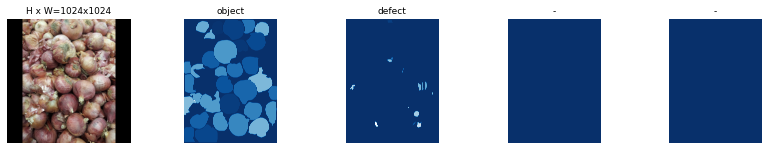

In [0]:
eval = EvalOnions(dataset_val,model,config)
#lets test 
#eval.evaluate_model()
eval.visualize_image()

image_id  14 /content/drive/My Drive/Colab Notebooks/Onions/case_study/val_data/IMG_20190810_114619.jpg
image                    shape: (4000, 3000, 3)       min:    0.00000  max:  255.00000  uint8
mask                     shape: (4000, 3000, 74)      min:    0.00000  max:    1.00000  uint8
class_ids                shape: (74,)                 min:    1.00000  max:    2.00000  int32
bbox                     shape: (74, 4)               min:   57.00000  max: 3881.00000  int32


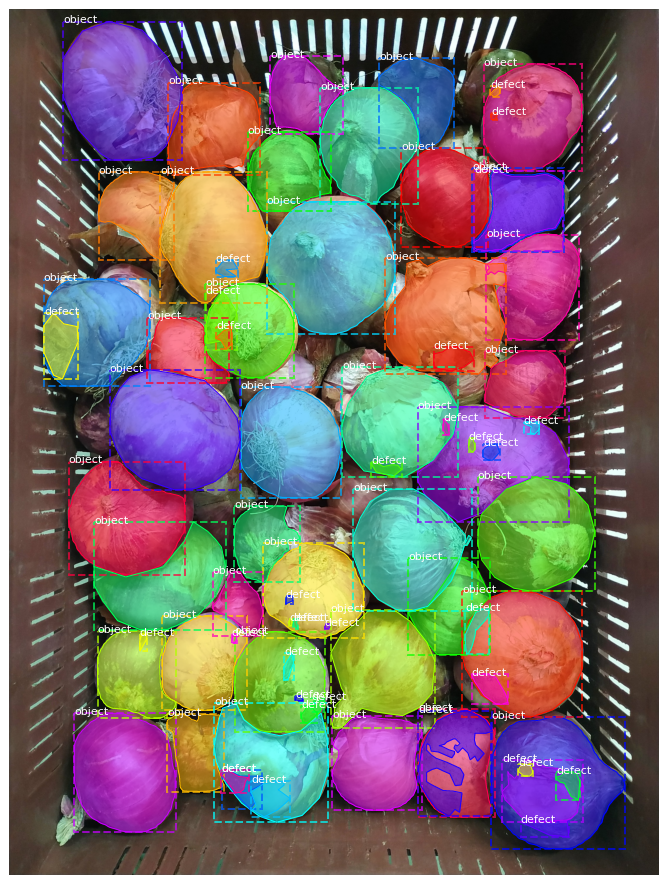

In [0]:
##Lets segment image
eval.draw_boxes()

In [0]:
AP, precisions, recalls = eval.evaluate_model()

1024
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
1024
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
1024
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  

In [0]:
#dataset_val.image_reference(12).split("/")[-1]
AP, precisions, recalls 
val_matrix = pd.DataFrame()
val_matrix["File Name"]  = [(dataset_val.image_reference(id).split("/")[-1])for id in precisions.keys()] 
val_matrix["Precisions"] = [val for val in precisions.values()]
val_matrix["recalls"]    = [val for val in recalls.values()]

In [0]:
val_matrix

File Name  Precisions   recalls
0   RackMultipart20181024-13943-133jlsj.jpg    0.923978  0.140625
1    RackMultipart20181024-13943-ewnvgq.jpg    0.943099  0.177104
2   RackMultipart20181024-13943-18zcl0i.jpg    0.952433  0.168822
3    RackMultipart20181022-23662-9owf20.jpg    0.915621  0.281647
4                   BAMOMR190625S2ONI02.jpg    0.872314  0.262829
5                   BAMOMR190701S2ONI02.jpg    0.940257  0.333538
6                   BAMJPN190629S1ONI01.jpg    0.973731  0.309346
7   RackMultipart20181022-23662-188nbun.jpg    0.928048  0.298264
8   RackMultipart20181022-23662-1hhgc3o.jpg    0.962625  0.292011
9                   IMG_20190810_120145.jpg    0.960378  0.301564
10                  BAMBLT190625S2ONI02.jpg    0.861857  0.275724
11                  IMG_20190807_151135.jpg    0.973392  0.306624
12                  IMG_20190807_151020.jpg    0.975879  0.306402
13   RackMultipart20181022-23662-2yisd3.jpg    0.921745  0.337132
14                  IMG_20190810_114619.jpg    0.962439  0.315315
15                  IMG_20190810_115236.jpg    0.934915  0.338816
16           IMG_20190810_132210_10-8-2.jpg    0.964051  0.353383
17                  IMG_20190810_102129.jpg    0.976773  0.343992
18                       BMOMR190620O01.jpg    0.921379  0.362842
19                  BAMJPN190801S2ONI02.jpg    0.946399  0.388326
20                  BAMSHN190731S2ONI01.jpg    0.818644  0.404698
21                  BAMYST190704I0ONI01.jpg    0.963267  0.392256
22                  IMG_20190810_102145.jpg    0.974959  0.400112
23                  IMG_20190810_102216.jpg    0.973521  0.423042
24                   OOFFC190731S2ONI01.jpg    0.941707  0.430233
25                       BMYST190621O01.jpg    0.931826  0.385996
26                  IMG_20190810_102404.jpg    0.967229  0.477449
27                  BAMSJP190724S2ONI02.jpg    0.846476  0.465608
28    RackMultipart20181202-2814-i17x91.jpg    0.869685  0.393860

In [0]:
AP

0.5550684685451858

In [0]:
dataset_train =  OnionnDataManager()
dataset_train.load_data_set("type","train_data")
dataset_train.prepare()

20190521_111942.jpg


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


IMG-0319.JPG
20190521_162937.jpg
20190521_162851.jpg
IMG-0347.JPG
IMG_20190521_111958.jpg
IMG-0319.JPG
IMG-0348.JPG
IMG_20190521_111930.jpg


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


IMG-0320.JPG
RackMultipart20181024-13943-p4jn3e.jpg
IMG_9273.jpg
IMG_9273.jpg
IMG_9382.jpg
20190521_161948.jpg
20190521_120956.jpg
RackMultipart20181022-23662-gp92k5.jpg
IMG_20190521_120859.jpg
IMG_20190524_150158.jpg
IMG_9274.jpg
IMG_9268.jpg
IMG_20190521_120941.jpg
IMG-0343.JPG
IMG-0320.JPG
IMG_20190524_150149.jpg
IMG_9383.jpg
IMG_9374.jpg
IMG_9269.jpg


In [0]:
eval = EvalOnions(dataset_train,model,config)
AP, precisions, recalls = eval.evaluate_model()

1024
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
1024
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
1024
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  

In [0]:
train_matrix = pd.DataFrame()
train_matrix["File Name"]  = [(dataset_train.image_reference(id).split("/")[-1])for id in precisions.keys()] 
train_matrix["Precisions(Avg)"] = [val for val in precisions.values()]
train_matrix["recalls(Avg)"] = [val for val in recalls.values()]

In [0]:
train_matrix

File Name  Precisions(Avg)  recalls(Avg)
0                      20190521_111942.jpg         0.967542      0.201117
1                             IMG-0319.JPG         0.973130      0.240382
2                      20190521_162937.jpg         0.972470      0.220729
3                      20190521_162851.jpg         0.971763      0.239600
4                             IMG-0347.JPG         0.948798      0.261852
5                  IMG_20190521_111958.jpg         0.980489      0.253827
6                             IMG-0319.JPG         0.975753      0.255293
7                             IMG-0348.JPG         0.952092      0.252213
8                  IMG_20190521_111930.jpg         0.975278      0.274830
9                             IMG-0320.JPG         0.968549      0.264943
10  RackMultipart20181024-13943-p4jn3e.jpg         0.935514      0.285636
11                            IMG_9273.jpg         0.947014      0.297729
12                            IMG_9273.jpg         0.975388      0.331697
13                            IMG_9382.jpg         0.975169      0.288836
14                     20190521_161948.jpg         0.973355      0.297531
15                     20190521_120956.jpg         0.966515      0.264052
16  RackMultipart20181022-23662-gp92k5.jpg         0.948892      0.289014
17                 IMG_20190521_120859.jpg         0.967985      0.332535
18                 IMG_20190524_150158.jpg         0.965979      0.335945
19                            IMG_9274.jpg         0.979592      0.297762
20                            IMG_9268.jpg         0.975454      0.302754
21                 IMG_20190521_120941.jpg         0.974144      0.319931
22                            IMG-0343.JPG         0.975270      0.340829
23                            IMG-0320.JPG         0.970350      0.326932
24                 IMG_20190524_150149.jpg         0.974833      0.338904
25                            IMG_9383.jpg         0.956823      0.346343
26                            IMG_9374.jpg         0.974627      0.312346
27                            IMG_9269.jpg         0.970830      0.360984

image_id  22 /content/drive/My Drive/Colab Notebooks/Onions/case_study/train_data/IMG-0343.JPG
image                    shape: (4032, 3024, 3)       min:    0.00000  max:  255.00000  uint8
mask                     shape: (4032, 3024, 81)      min:    0.00000  max:    1.00000  uint8
class_ids                shape: (81,)                 min:    1.00000  max:    2.00000  int32
bbox                     shape: (81, 4)               min:  320.00000  max: 3833.00000  int32


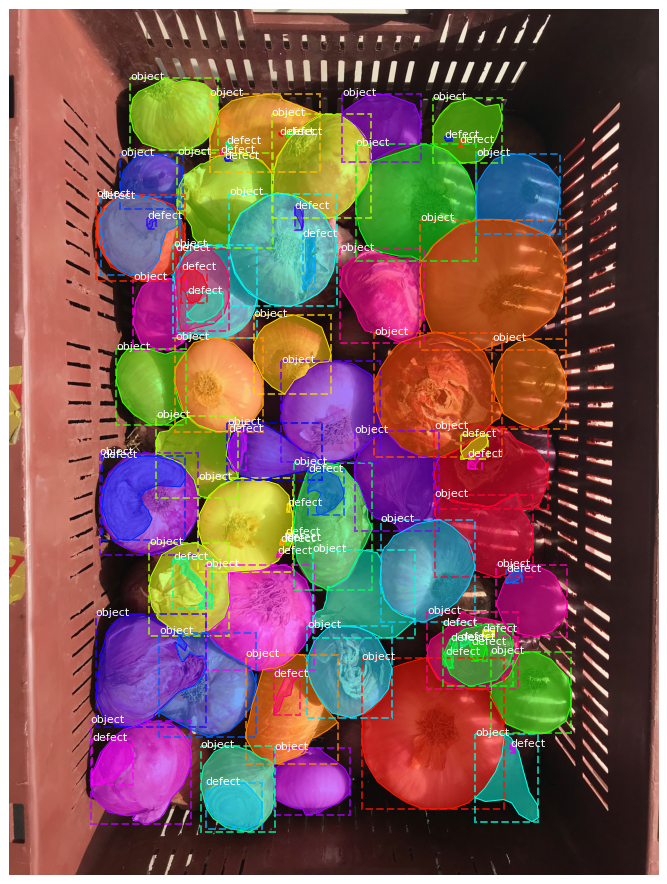

In [0]:
eval.draw_boxes()

In [0]:
AP

0.5161870585787922

In [0]:
#####SmutOnionModelConfig

In [0]:
#Let's Build Model Classes
import skimage.draw
import json
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
#import mrcnn.utils
from mrcnn import model as modellib, utils
MODEL_NAME_SMUT = "SmutOnion"



class SmutOnionModelConfig(Config):
  """
  Configuration for training on onion dataset.
  Derives from the base Config class and overrides some values.
  """
  NAME = MODEL_NAME_SMUT
  IMAGES_PER_GPU = 1 #collab
  NUM_CLASSES = 1 + 1 + 1 # Background + smut + other
  STEPS_PER_EPOCH = 10
  ##ToDo : make in 0.9 Just doing first time for
  ##Fast Traning 
  DETECTION_MIN_CONFIDENCE = 0.7
  ##may be need to override Anchors 

class SmutOnionDataManager(OnionnDataManager):
  
  ##lets take defect images 
  def load_data_set(self,attribute,subset,type=None,classes = []):
    """
    Load a subset of the Onion dataset.
    Args:
     attribute : Key in the dataset
     values    : value of the classes 
     subset: Subset to load: train or val

    only attributes are supported here "type" and "onion"

    """
    if(attribute != "type" and attribute != "onion"):
      return
    if(attribute == "type"):
      self.add_class(MODEL_NAME,1, "object")
      self.add_class(MODEL_NAME,2, "defect")
    
    elif(attribute == "onion"):
      for index,item in enumerate(classes):
        self.add_class(MODEL_NAME,index+1, item)
        

    #onion_data = OnionDataAnalytics(TRAIN_JSON)
    #onion_data_frame = onion_data
    #getting frame of json
    #This will give type of onions in each image 
    _ , onion_type_dict_list = OnionDataAnalytics.get_count_of_keys(onion_data_frame["region_attributes"],attribute)

    #Selecting Training Data based on list of onion types
    train,test = onion_data.select_traning_data_indices(onion_type_dict_list,classes[0],0.7,1400,True)
    if(subset == "train_data"):
      dic_of_list_indices = train
    elif (subset == "val_data"):
      dic_of_list_indices = test
    ##to do remove hard coded
    dataset_dir = os.path.join(DATA_PATH,"train_data")
    #set each parameter
    
    ##Wrong data in json
    for index in dic_of_list_indices["List of Indices"]:
      if(onion_data_frame['filename'][index] == "IMG-0319.jpg" ):
        onion_data_frame['filename'][index] = "IMG-0319.JPG"
      elif(onion_data_frame['filename'][index] =="IMG-0320.jpg"):
        onion_data_frame['filename'][index] = "IMG-0320.JPG"
      
      print(onion_data_frame['filename'][index])  
      image_path = dataset_dir +"/"+ onion_data_frame['filename'][index]
      image = skimage.io.imread(image_path)
      height, width = image.shape[:2]
      #Polygons for each image
      polygons = onion_data_frame['shape_attributes'][index]
      #Setting numbers to class ids
      class_ids =[onion_data.get_id_from_defect_type(attr[attribute]) for attr in onion_data_frame['region_attributes'][index]]
      class_names = []
      for attr in onion_data_frame['region_attributes'][index]:
        print(attr)
        if( attr == attr[attribute]):
          class_names.append(attr[attribute])
        else:
          class_names.append("other defect")
      
      self.add_image(
        MODEL_NAME,
        image_id=onion_data_frame['filename'][index],  # use file name as a unique image id
        path=image_path,
        width=width, height=height,
        polygons=polygons,
        class_ids=class_ids,
        class_names=class_names)
      
 
  def load_mask(self, image_id):
    """
        Generate instance masks for an image.
        Returns:
        masks: A bool array of shape [height, width, instance count] with
        one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
    """
    # If not a balloon dataset image, delegate to parent class.
    image_info = self.image_info[image_id]
    if image_info["source"] != MODEL_NAME:
      return super(self.__class__, self).load_mask(image_id)
    
    class_ids = image_info['class_ids']

    # Convert polygons to a bitmap mask of shape
    # [height, width, instance_count]
    info = self.image_info[image_id]
    mask = np.zeros([info["height"], info["width"], len(info["polygons"])],
                    dtype=np.uint8)
    for i, p in enumerate(info["polygons"]):
      # Get indexes of pixels inside the polygon and set them to 1
      rr, cc = skimage.draw.polygon(p['all_points_y'], p['all_points_x'])
      mask[rr, cc, i] = 1

    # Return mask, and array of class IDs of each instance. Since we have
    # one class ID only, we return an array of 1s
    # return mask.astype(np.bool), np.ones([mask.shape[-1]], dtype=np.int32)
    class_ids = np.array(class_ids, dtype=np.int32)
    return mask, class_ids  

  def image_reference(self, image_id):
    """Return the path of the image."""
    info = self.image_info[image_id]
    if info["source"] == MODEL_NAME:
        return info["path"]
    else:
        super(self.__class__, self).image_reference(image_id)


def train(model):
  """
  Train the model.
  """
 


  # Training dataset.
  dataset_train = SmutOnionDataManager()
  dataset_train.load_data_set("onion","train_data",classes = ["smut","other defect"])
  dataset_train.prepare()

  # Validation dataset
  dataset_val =  OnionnDataManager()
  dataset_val.load_data_set("onion", "val_data")
  dataset_val.prepare()

  # *** This training schedule is an example. Update to your needs ***
  # Since we're using a very small dataset, and starting from
  # COCO trained weights, we don't need to train too long. Also,
  # no need to train all layers, just the heads should do it.
  # print("Training network heads")
  #model_inference = modellib.MaskRCNN(mode="inference", config=config,
  #                                          model_dir=LOGS_DIR)

  # mean_average_precision_callback = modellib.MeanAveragePrecisionCallback(model, model_inference, 
  #                                                                         dataset_val, calculate_map_at_every_X_epoch=1, verbose=1)

  model.train(dataset_train, dataset_val,
              learning_rate=config.LEARNING_RATE,
              epochs=10,
              layers='heads')
   #           custom_callbacks=[mean_average_precision_callback])
  
    

  


In [0]:

config = SmutOnionModelConfig()
model = modellib.MaskRCNN(mode="inference", model_dir=LOGS_DIR,config=config)
model.load_weights(get_weights_path(MODEL_NAME), by_name=True)

train(model)

In [0]:
import skimage.draw
import json
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
#import mrcnn.utils
from mrcnn import model as modellib, utils
MODEL_NAME_MULTI = "Multi Class Onion"



def get_id_from_multi_class_model(name):
  if(name.lower()=="onion"):
    return 1
  elif(name.lower()=="smut effected"):
    return 2
  elif(name.lower()=="rotten"):
    return 3
  else:
    return 4

def map_names_for_model(name):
  if(name.lower()!="onion" and name.lower()!="smut effected" and name.lower()!="rotten"):
    return "other" 
  return name


class MultiOnionModelConfig(Config):
  """
  Configuration for training on onion dataset.
  Derives from the base Config class and overrides some values.
  """
  NAME = MODEL_NAME_MULTI
  IMAGES_PER_GPU = 1 #collab
  NUM_CLASSES = 1 + 4 # Background + "onion" + "smut effected" + "rotten"
  STEPS_PER_EPOCH = 50
  ##ToDo : make in 0.9 Just doing first time for
  ##Fast Traning 
  DETECTION_MIN_CONFIDENCE = 0.7
  ##may be need to override Anchors 

class MultiOnionDataManager(OnionnDataManager):
  
  ##lets take defect images 
  def load_data_set(self,attribute,subset,type=None,classes = []):
    """
      Load a subset of the Onion dataset.
      Args:
      attribute : Key in the dataset
      values    : value of the classes 
      subset: Subset to load: train or val
      
      only attributes are supported here "type" and "onion
    """
    
    if(attribute != "type" and attribute != "onion"):
      return
    if(attribute == "type"):
      self.add_class(MODEL_NAME_MULTI,1, "object")
      self.add_class(MODEL_NAME_MULTI,2, "defect")
    
    elif(attribute == "onion"):
      for index,item in enumerate(classes):
        self.add_class(MODEL_NAME_MULTI,index+1, item)
        
    

    #onion_data_frame = onion_data
    #getting frame of json
    #This will give type of onions in each image 
    
    ##to do remove sum
    sum = 100000
    if(subset == "val_data"):
        onion_data = OnionDataAnalytics(VAL_JSON)
        dataset_dir = os.path.join(DATA_PATH,"val_data")
    else:
       onion_data = OnionDataAnalytics(TRAIN_JSON)
       dataset_dir = os.path.join(DATA_PATH,"train_data")
       sum = 400

    onion_data_frame = onion_data.pre_process_onions_data()

    _ ,onion_type_dict_list = OnionDataAnalytics.get_count_of_keys(onion_data_frame["region_attributes"],attribute)
    #Selecting Training Data based on list of onion types
    if(attribute == "type"):
      train,_ = onion_data.select_traning_data_indices(onion_type_dict_list,'Defect',0.7,sum,True)
    else:
      train,_ = onion_data.select_traning_data_indices(onion_type_dict_list,type,0.7,sum,True)
      ##Hack will remove later 
      if(type== "smut effected"):
        train_,_ = onion_data.select_traning_data_indices(onion_type_dict_list,"rotten",0.7,sum,True)
        #print(train_['List of Indices']) 
        tmp = [*list(train['List of Indices']) , *list(train_['List of Indices'])]
        train['List of Indices'] = tmp 
        tmp = [*list(train['List of Values']) , *list(train_['List of Values'])]
        train['List of Values'] = tmp
        train['List of Indices'] = list(dict.fromkeys(train['List of Indices']))
        tmp = train['List of Values']
        train['List of Values'] = []
        for i in range(len(train['List of Indices'])):
          train['List of Values'].append(tmp[i])
        
    dic_of_list_indices = train
    ##to do remove hard coded

    #dataset_dir = os.path.join(DATA_PATH,"train_data")
    #set each parameter
    
    ##Wrong data in json
    for index in dic_of_list_indices["List of Indices"]:
      if(onion_data_frame['filename'][index] == "IMG-0319.jpg" ):
        onion_data_frame['filename'][index] = "IMG-0319.JPG"
      elif(onion_data_frame['filename'][index] =="IMG-0320.jpg"):
        onion_data_frame['filename'][index] = "IMG-0320.JPG"
      
      print(onion_data_frame['filename'][index])  
      image_path = dataset_dir +"/"+ onion_data_frame['filename'][index]
      print(image_path)
      image = skimage.io.imread(image_path)
      height, width = image.shape[:2]
      #Polygons for each image
      polygons = onion_data_frame['shape_attributes'][index]
      #Setting numbers to class ids
      class_ids =[get_id_from_multi_class_model(attr[attribute]) for attr in onion_data_frame['region_attributes'][index]]
      class_names =[attr[attribute] for attr in onion_data_frame['region_attributes'][index]]
    

    #onion_data = OnionDataAnalytics(TRAIN_JSON)
    #onion_data_frame = onion_data
    #getting frame of json
    #This will give type of onions in each image 
    
      for attr in onion_data_frame['region_attributes'][index]:
        if( attr == attr[attribute]):
          class_names.append(attr[attribute])
        else:
          class_names.append("other defect")
      
      self.add_image(
        MODEL_NAME_MULTI,
        image_id=onion_data_frame['filename'][index],  # use file name as a unique image id
        path=image_path,
        width=width, height=height,
        polygons=polygons,
        class_ids=class_ids,
        class_names=class_names)
      
    def load_mask(self, image_id):
      """
          Generate instance masks for an image.
          Returns:
          masks: A bool array of shape [height, width, instance count] with
          one mask per instance.
          class_ids: a 1D array of class IDs of the instance masks.
      """
      # If not a balloon dataset image, delegate to parent class.
      image_info = self.image_info[image_id]
      if image_info["source"] != MODEL_NAME_MULTI:
        return super(self.__class__, self).load_mask(image_id)
      
      class_ids = image_info['class_ids']

      # Convert polygons to a bitmap mask of shape
      # [height, width, instance_count]
      info = self.image_info[image_id]
      mask = np.zeros([info["height"], info["width"], len(info["polygons"])],
                      dtype=np.uint8)
      for i, p in enumerate(info["polygons"]):
        # Get indexes of pixels inside the polygon and set them to 1
        rr, cc = skimage.draw.polygon(p['all_points_y'], p['all_points_x'])
        mask[rr, cc, i] = 1

      # Return mask, and array of class IDs of each instance. Since we have
      # one class ID only, we return an array of 1s
      # return mask.astype(np.bool), np.ones([mask.shape[-1]], dtype=np.int32)
      class_ids = np.array(class_ids, dtype=np.int32)
      return mask, class_ids  

  def image_reference(self, image_id):
    """Return the path of the image."""
    info = self.image_info[image_id]
    if info["source"] == MODEL_NAME_MULTI:
        return info["path"]
    else:
        super(self.__class__, self).image_reference(image_id)


def train(model):
  """
  Train the model.
  """
  config = MultiOnionModelConfig()
  # Training dataset.
  dataset_train = MultiOnionDataManager()
  dataset_train.load_data_set("type","train_data","smut effected",["onion","smut effected","rotten","other"])
  dataset_train.prepare()

  # Validation dataset
  dataset_val =  MultiOnionDataManager()
  dataset_val.load_data_set("type", "val_data","smut effected",["onion","smut effected","rotten","other"])
  dataset_val.prepare()

  # *** This training schedule is an example. Update to your needs ***
  # Since we're using a very small dataset, and starting from
  # COCO trained weights, we don't need to train too long. Also,
  # no need to train all layers, just the heads should do it.
  # print("Training network heads")
  #model_inference = modellib.MaskRCNN(mode="inference", config=config,
  #                                          model_dir=LOGS_DIR)

  # mean_average_precision_callback = modellib.MeanAveragePrecisionCallback(model, model_inference, 
  #                                                                         dataset_val, calculate_map_at_every_X_epoch=1, verbose=1)

  model.train(dataset_train, dataset_val,
              learning_rate=config.LEARNING_RATE,
              epochs=100,
              layers='heads')
   #           custom_callbacks=[mean_average_precision_callback])
  
    

    
def color_splash(image, mask):
  """Apply color splash effect.
  image: RGB image [height, width, 3]
  mask: instance segmentation mask [height, width, instance count]
  Returns result image.
  """
  # Make a grayscale copy of the image. The grayscale copy still
  # has 3 RGB channels, though.
  gray = skimage.color.gray2rgb(skimage.color.rgb2gray(image)) * 255
  # Copy color pixels from the original color image where mask is set
  if mask.shape[-1] > 0:
      # We're treating all instances as one, so collapse the mask into one layer
      mask = (np.sum(mask, -1, keepdims=True) >= 1)
      splash = np.where(mask, image, gray).astype(np.uint8)
  else:
      splash = gray.astype(np.uint8)
  return splash




def get_model(name,mode):
  if(name == MODEL_NAME_MULTI):
    config = MultiOnionModelConfig()
    model = modellib.MaskRCNN(mode=mode, model_dir=LOGS_DIR,config=config)
  if(mode == "training"):
    model.load_weights(get_weights_path(MODEL_NAME), by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",
                       "mrcnn_bbox", "mrcnn_mask"])
  else:
    model.load_weights(get_weights_path(MODEL_NAME), by_name=True)

  return model


In [0]:
model = get_model(MODEL_NAME_MULTI,"training")

Re-starting from epoch 46


In [0]:
import sys
sys.setrecursionlimit(1500)
train(model)

20190521_111942.jpg
/content/drive/My Drive/Colab Notebooks/Onions/case_study/train_data/20190521_111942.jpg


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


IMG-0319.JPG
/content/drive/My Drive/Colab Notebooks/Onions/case_study/train_data/IMG-0319.JPG
20190521_162937.jpg
/content/drive/My Drive/Colab Notebooks/Onions/case_study/train_data/20190521_162937.jpg
20190521_162851.jpg
/content/drive/My Drive/Colab Notebooks/Onions/case_study/train_data/20190521_162851.jpg
IMG-0347.JPG
/content/drive/My Drive/Colab Notebooks/Onions/case_study/train_data/IMG-0347.JPG
IMG_20190521_111958.jpg
/content/drive/My Drive/Colab Notebooks/Onions/case_study/train_data/IMG_20190521_111958.jpg
RackMultipart20181024-13943-133jlsj.jpg
/content/drive/My Drive/Colab Notebooks/Onions/case_study/val_data/RackMultipart20181024-13943-133jlsj.jpg
RackMultipart20181024-13943-ewnvgq.jpg
/content/drive/My Drive/Colab Notebooks/Onions/case_study/val_data/RackMultipart20181024-13943-ewnvgq.jpg
RackMultipart20181024-13943-18zcl0i.jpg
/content/drive/My Drive/Colab Notebooks/Onions/case_study/val_data/RackMultipart20181024-13943-18zcl0i.jpg
RackMultipart20181022-23662-9owf20.j

/tensorflow-1.15.0/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.0/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.0/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py:49: UserWarning: Using a generator with `use_multiprocessing=True` and multiple 

Epoch 47/100


ERROR:root:Error processing image {'id': 'IMG-0347.JPG', 'source': 'Multi Class Onion', 'path': '/content/drive/My Drive/Colab Notebooks/Onions/case_study/train_data/IMG-0347.JPG', 'width': 3024, 'height': 4032, 'polygons': [{'name': 'polygon', 'all_points_x': [587, 624, 665, 729, 821, 859, 869, 872, 890, 911, 925, 915, 880, 851, 806, 729, 700, 647, 553, 501, 477, 478, 509, 562, 568], 'all_points_y': [269, 255, 250, 252, 281, 311, 326, 365, 439, 477, 511, 556, 624, 654, 678, 715, 721, 716, 680, 612, 503, 421, 334, 288, 268]}, {'name': 'polygon', 'all_points_x': [492, 459, 419, 442, 489, 607, 718, 752, 719, 703, 716, 723, 669, 601, 542, 501], 'all_points_y': [626, 675, 761, 926, 985, 1014, 979, 921, 889, 848, 804, 716, 717, 699, 675, 616]}, {'name': 'polygon', 'all_points_x': [1011, 1017, 1023, 1031, 1063, 1071, 1076, 1056, 1026, 1003, 977, 955, 922, 869, 872, 891, 928, 964, 990, 972, 982, 1022, 1002, 985, 1003, 1046, 1068, 1090, 1148, 1218, 1283, 1282, 1350, 1376, 1398, 1388, 1345, 126

MaybeEncodingError: ignored